In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ConstraintBased.CDNOD import cdnod
from causallearn.search.FCMBased.ANM.ANM import ANM
from causallearn.utils.cit import kci
from causallearn.utils.KCI.PolynomialKernel import PolynomialKernel


from dataset import EarthSystemsDataset


In [3]:
data_var_names = ['global_temp', 'elec_fossil', 'elec_clean', 'co2', 'ch4', 'petroleum']
y_vals = ['temp_change']
lags = 15

earth_data = EarthSystemsDataset(data_var_names, y_vals=y_vals, val_frac=0.1, lags=lags, mode='ann')
earth_data.full_mode()
earth_data.data.columns = ['Global Temperature',
                           'Electricity Generation (Fossil Fuels)',
                           'Electricity Generation (Clean)',
                           'Carbon Dioxide Emissions',
                           'Methane Emissions',
                           'Petroleum Production']
earth_data.data

Global Temperature  Electricity Generation (Fossil Fuels)  \
year month                                                              
1983 Jul                  0.18                               4.325726   
     Aug                  0.35                               4.710642   
     Sep                  0.37                               4.546845   
     Oct                  0.17                               4.699021   
     Nov                  0.30                               4.574850   
...                        ...                                    ...   
2023 May                  0.94                               7.244133   
     Jun                  1.08                               7.063367   
     Jul                  1.19                               7.253938   
     Aug                  1.19                               7.397303   
     Sep                  1.48                               7.202198   

            Electricity Generation (Clean)  Carbon Dioxide Emissions  \
year month                                                             
1983 Jul                          0.345359                    342.14   
     Aug                          0.338025                    340.62   
     Sep                          0.315758                    340.53   
     Oct                          0.320524                    341.75   
     Nov                          0.325785                    342.83   
...                                    ...                       ...   
2023 May                          0.740660                    420.56   
     Jun                          0.691709                    419.57   
     Jul                          0.711895                    417.85   
     Aug                          0.711962                    416.59   
     Sep                          0.666253                    416.99   

            Methane Emissions  Petroleum Production  
year month                                           
1983 Jul              1625.94           8636.032000  
     Aug              1628.06           8679.129000  
     Sep              1638.44           8784.333000  
     Oct              1644.79           8770.645000  
     Nov              1642.60           8770.367000  
...                       ...                   ...  
2023 May              1920.00          80846.269332  
     Jun              1915.94          81759.208221  
     Jul              1914.56          81006.724819  
     Aug              1919.15          80639.447798  
     Sep              1927.35          81554.209233  

[483 rows x 6 columns]

In [4]:
d = earth_data.data.to_numpy()
cg = cdnod(d, np.arange(earth_data.data.shape[0]).reshape(-1,1) / 10.0, indep_test='kci')

  0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
earth_data.data.columns

Index(['Global Temperature', 'Electricity Generation (Fossil Fuels)',
       'Electricity Generation (Clean)', 'Carbon Dioxide Emissions',
       'Methane Emissions', 'Petroleum Production'],
      dtype='object')

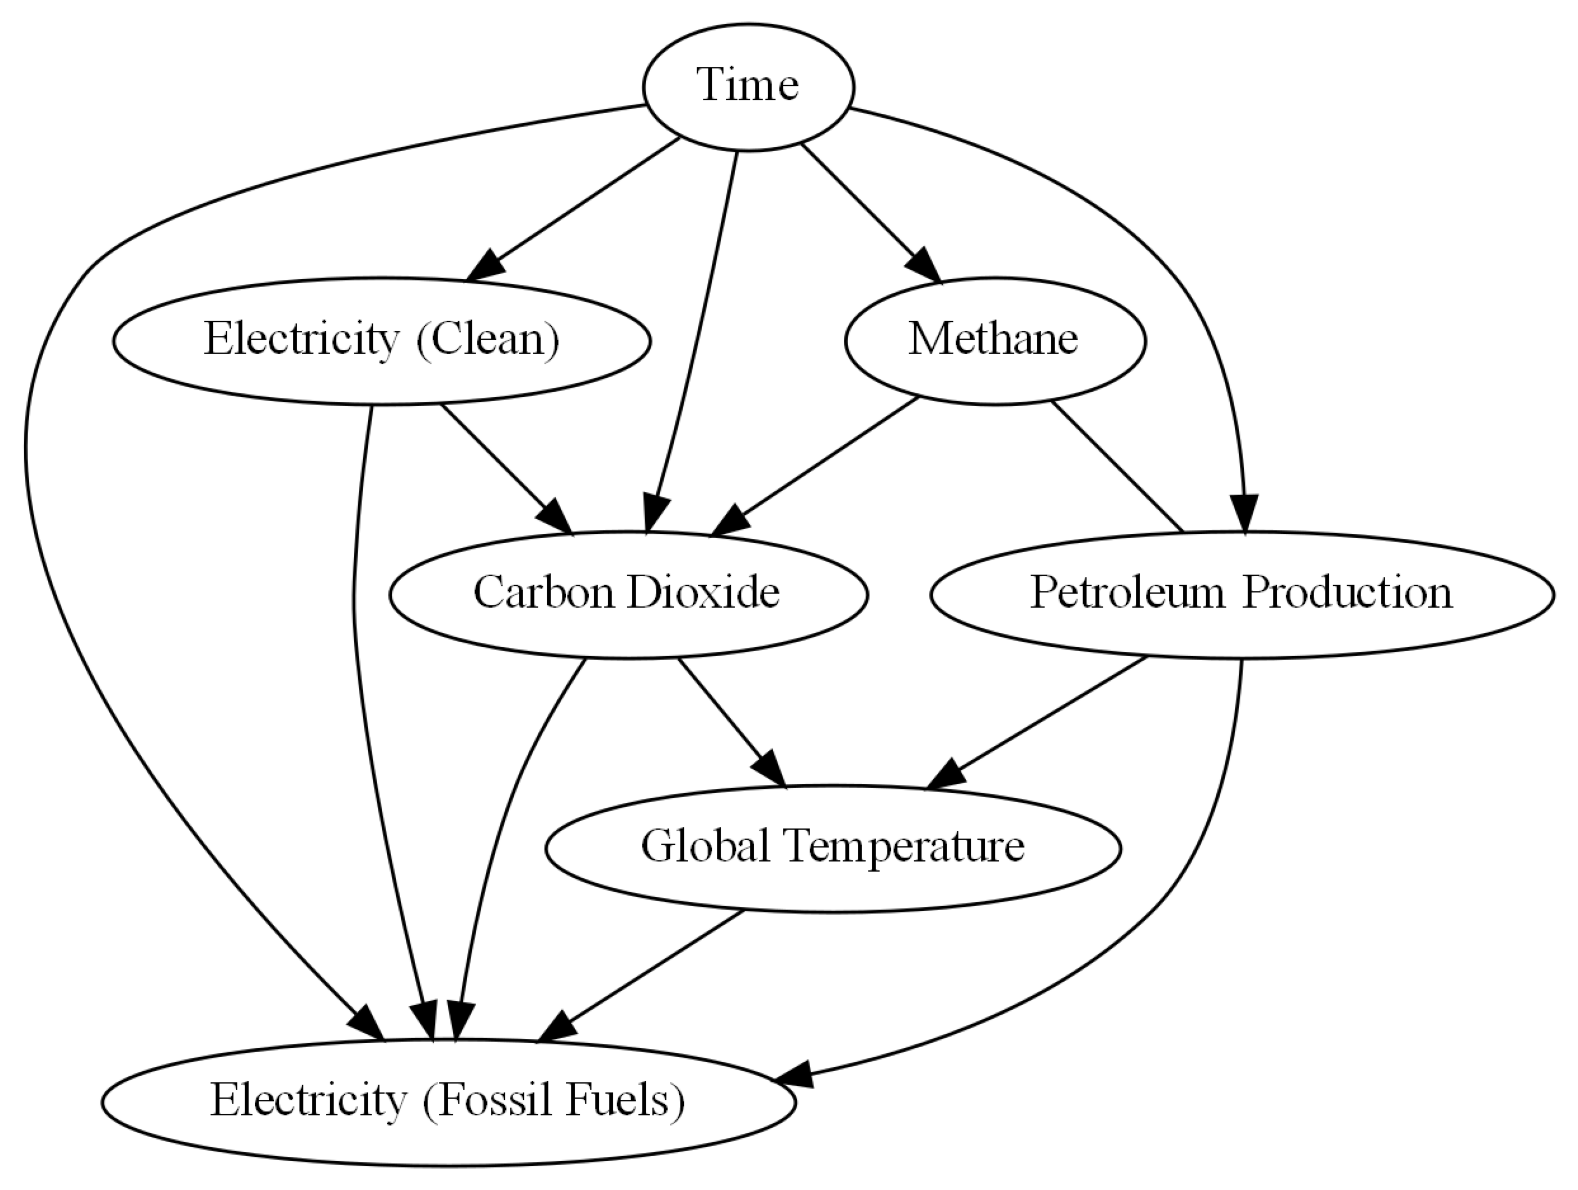

In [6]:
cg.draw_pydot_graph(labels=['Global Temperature',
                           'Electricity (Fossil Fuels)',
                           'Electricity (Clean)',
                           'Carbon Dioxide',
                           'Methane',
                           'Petroleum Production']+['Time'])